# Investigation of Ford GoBike Service Users Characteristics on Their Trips Duration
## by Marwan Abdellattif

## Investigation Overview

In this investigation, I aim to look at the effect of the user's type and age on the trip duration. 

## Dataset Overview

The dataset has information about bike rides from Ford GoBike service. The dataset contatins 16 feature that describe the trip and their user. It was collected in 2019. The duration variable was transformed to minutes for better interpretation. Additionally, the dataset was cut for durations shorter than 60 minutes as the higher durations are outliers.  

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
FordGoBike = pd.read_csv('FordGoBike_clean.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Trips Duration Distribtuion

It is shown that the figure is unimodal with one peak. It shows a right skewed distribtuion, where most of the durations are between 0 and 10 mins. The trips duration decreases after the peak gradually.

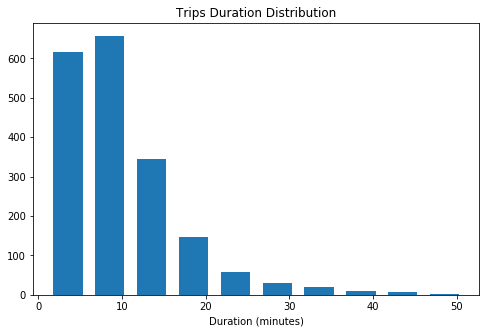

In [3]:
binsize = 5 
plt.figure(figsize = [8,5]); 
bins = np.arange(FordGoBike.duration_mins.min(), FordGoBike.duration_mins.max()+binsize, binsize)
plt.hist(FordGoBike.duration_mins, bins = bins, rwidth = 0.7);
plt.title('Trips Duration Distribution');
plt.xlabel ('Duration (minutes)');


## Distribution of Age Groups

The younger ages have higher trips than older ages. The young adults group , which are the ages from 18 to 35 have more than 1200 trip. However, adults (35 to 55) have less than 600 trip, and seniors (> 55) are much lower with almost 100 trip.

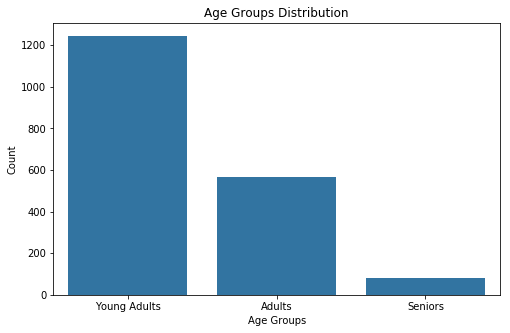

In [4]:
plt.figure(figsize = [8,5]);
color_base = sns.color_palette()[0]
sns.countplot(x = FordGoBike.Age_groups, color = color_base);
plt.title('Age Groups Distribution');
plt.xlabel ('Age Groups');
plt.ylabel ('Count');
plt.show()

## Distribution of User Types

The user types distribution shows a major difference between the subscribers and customers. The subscribers are dominant in the dataset with trips higher than 1500, while the customers are lower than 250 trips.

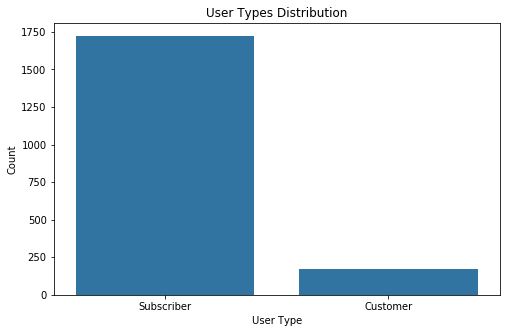

In [5]:
plt.figure(figsize = [8,5]);
color_base = sns.color_palette()[0]
sns.countplot(x = FordGoBike.user_type, color = color_base);
plt.title('User Types Distribution');
plt.xlabel ('User Type');
plt.ylabel ('Count');
plt.show()

## Trips Duration for Age Groups

The age groups do not show a clear relationship with the trip duration, as they all are similar to each other and have approximately a median of 10 minutes.

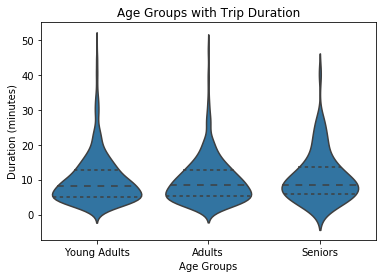

In [6]:
default_color = sns.color_palette()[0]
sns.violinplot(FordGoBike.Age_groups, FordGoBike.duration_mins, color = default_color, inner= 'quartile');
plt.title('Age Groups with Trip Duration');
plt.xlabel ('Age Groups');
plt.ylabel ('Duration (minutes)');
plt.show()


## Trips Duration for User Types

The subscriber group has much higher frequency in the dataset. However, the customer group has higher trip duration. 

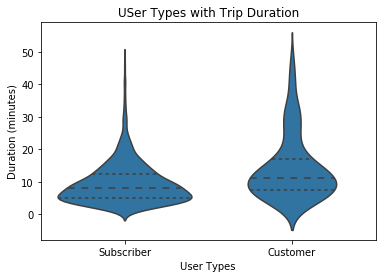

In [7]:
default_color = sns.color_palette()[0]
sns.violinplot(FordGoBike.user_type, FordGoBike.duration_mins, color = default_color, inner= 'quartile');
plt.title('USer Types with Trip Duration');
plt.xlabel ('User Types');
plt.ylabel ('Duration (minutes)');
plt.show()

## Trips Duration across User Types and Age Groups
The multivariate analysis of the user type, age groups and trip duration shows longer duration for younger ages in customers. It was surprising that the senior group had longer trips duration in subscribers. It was expected that younger ages will have longer durations. 

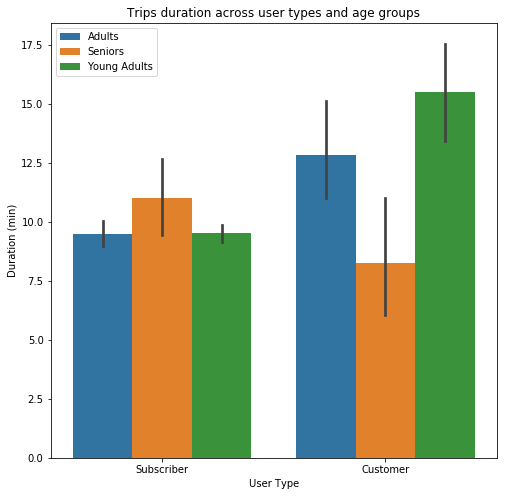

In [8]:
plt.figure(figsize = [8, 8])

ax = sns.barplot(x='user_type', y = 'duration_mins', hue='Age_groups', data=FordGoBike.sort_values(by= 'Age_groups'))
plt.title('Trips duration across user types and age groups')
plt.xlabel('User Type')
plt.ylabel('Duration (min)')
leg = ax.legend()